In [1]:
## to-do 
## Scheme of the octants grid

In [2]:
%pylab inline
import biff
import coefficients_smoothing
from mwlmc_bfe import smooth_coeff

Populating the interactive namespace from numpy and matplotlib


In [3]:
font = {'size':20, 'family':'serif'}
matplotlib.rc('font', **font)

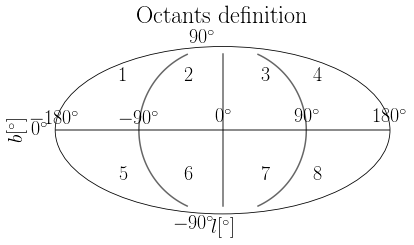

In [180]:
#fig = plt.figure(figsize=(6,6))


fig  = plt.subplot(1,1,1, projection='mollweide')
title('Octants definition', y=1.1)
fig.axhline(0, c='k', alpha=0.6)
fig.axvline(0, c='k', alpha=0.6)
fig.axvline(-np.pi/2., c='k', alpha=0.6)
fig.axvline(np.pi/2., c='k', alpha=0.6)

fig.text(-np.pi/1.3, np.pi/4., '1')
fig.text(-np.pi/3.5, np.pi/4., '2')
fig.text(np.pi/3.5, np.pi/4., '3')
fig.text(np.pi/1.5, np.pi/4., '4')

fig.text(-np.pi/1.3, -np.pi/4., '5')
fig.text(-np.pi/3.5, -np.pi/4., '6')
fig.text(np.pi/3.5, -np.pi/4., '7')
fig.text(np.pi/1.5, -np.pi/4., '8')

xlabel('$l[^{\circ}]$')
ylabel('$b[^{\circ}]$')
xticks([-np.pi, -np.pi/2., 0, np.pi/2., np.pi])
yticks([-np.pi/2., 0, np.pi/2.])

savefig('octants_def.pdf', bbox_inches='tight')

In [145]:
def spherical_grid(n_points, rmin, rmax):
    phi = np.random.rand(n_points)*2*np.pi
    arccos = (np.random.rand(n_points)*2 - 1)
    theta = np.arccos(arccos)
    
    rmin = (rmin/3.)**3.
    rmax = (rmax/3.)**3.

    r = 3*(np.random.rand(n_points)*(rmax-rmin) + rmin)**(1/3.)
    x = r * sin(theta)*cos(phi) 
    y = r * sin(theta)*sin(phi) 
    z = r * cos(theta) 

    return np.ascontiguousarray(np.array([x, y, z]).T)

def octant_grid(n_points, rmin, rmax, octant):
    phi = np.random.rand(n_points)*2*np.pi
    arccos = (np.random.rand(n_points)*2 - 1)
    
    rmin = (rmin/3.)**3.
    rmax = (rmax/3.)**3.
    
    if octant==4:
        index = np.where((phi<np.pi/2.) & (arccos>0))[0]
    elif octant==3:
        index = np.where((phi<np.pi) & (phi>np.pi/2.) & (arccos>0))[0]
    elif octant==2:
        index = np.where((phi<3*np.pi/2.) & (phi>np.pi) & (arccos>0))[0]
    elif octant==1:
        index = np.where((phi<2*np.pi) & (phi>3*np.pi/2.) & (arccos>0))[0]
    elif octant==8:
        index = np.where((phi<np.pi/2.) & (arccos<0))[0]
    elif octant==7:
        index = np.where((phi<np.pi) & (phi>np.pi/2.) & (arccos<0))[0]
    elif octant==6:
        index = np.where((phi<3*np.pi/2.) & (phi>np.pi) & (arccos<0))[0]
    elif octant==5:
        index = np.where((phi<2*np.pi) & (phi>3*np.pi/2.) & (arccos<0))[0]
    else:
        index=np.arange(0, len(phi),1)
    theta = np.arccos(arccos[index])
    phi = phi[index]
        
    r = 3*(np.random.rand(len(index))*(rmax-rmin) + rmin)**(1/3.)
    x = r * sin(theta)*cos(phi) 
    y = r * sin(theta)*sin(phi) 
    z = r * cos(theta) 

    return np.ascontiguousarray(np.array([x, y, z]).T)

def spherical_grid_shift(xyz, shift_com):
    x_shift = xyz[:,0] - shift_com[0]
    y_shift = xyz[:,1] - shift_com[1]
    z_shift = xyz[:,2] - shift_com[2]
    return np.ascontiguousarray(np.array([x_shift, y_shift, z_shift]).T)

def eval_bfe_spherical_grid(n_points, rmin, rmax, dr, S1, T1, rs, S2=0, T2=0, shift=0, octant=0, M=1):
    G_gadget = 43007.1
    r = np.arange(rmin, rmax, dr)
    n_points_shell = int(n_points/(len(r)-1))
    ax_r = np.zeros(len(r))
    ay_r = np.zeros(len(r))
    az_r = np.zeros(len(r))
    a_r1 = np.zeros(len(r))
    a_r2 = np.zeros(len(r))
    print(octant)
    n_points_r = np.zeros(len(r))
    for i in range(len(r)-1):
        xyz = octant_grid(n_points, r[i], r[i+1], octant)
        if shift==1:
            xyz = spherical_grid_shift(xyz, [-1.6172733999999993, -41.39907439, -27.93125875])
            
        a1 = biff.gradient(xyz, S1, T1, G=G_gadget, M=1, r_s=rs)
        a_r1[i] = np.median(np.sqrt(a1[:,0]**2+ a1[:,1]**2 + a1[:,2]**2))
      
    #if type(S2) != int:
    #    a2 = biff.gradient(xyz, S2, T2, rs, M=M)
    #    a_r2[i] = np.median(np.sqrt(a2[:,0]**2+ a2[:,1]**2 + a2[:,2]**2))
    #r2 = np.sqrt(xyz[:,0]**2 + xyz[:,1]**2 + xyz[:,2]**2)
    return r, a_r1

In [10]:
covmat_lmc_path = '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_covmat_sample_0'
coeff_lmc_path = '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_coeff_sample_0'

covmat_mw_path = '../data/MW/MW_ref/mw_reference_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mw_path =  '../data/MW/MW_ref/mw_reference_BFE_T_V_iterative_1e6_300_coeff_sample_0'


covmat_mwlmc_path = '../data/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_covmat_sample_0'
coeff_mwlmc_path = '../data/MW/MW_lmc_unbound/mwlmc_unbound_BFE_T_V_iterative_1e6_300_coeff_sample_0'

mass = 1.7995383e-05


In [11]:
!head '../data/LMC/BFE_bound/LMC_1M_iterative_bound_T_V_BFE_coeff_sample_0000_snap_0000.txt'

#S 	 T 	  n 	 l 	 m 
8.009492578491e+00 	  -0.000000000000e+00 	 0 	 0 	 0 
-3.851325421356e-01 	  -0.000000000000e+00 	 0 	 1 	 0 
5.364466342047e-02 	  5.410224605501e-02 	 0 	 1 	 1 
1.821709938665e+00 	  -0.000000000000e+00 	 0 	 2 	 0 
3.537330772698e-01 	  -7.423514037820e-01 	 0 	 2 	 1 
-6.077837899761e-01 	  -1.879140447572e-02 	 0 	 2 	 2 
6.042961053093e-01 	  -0.000000000000e+00 	 0 	 3 	 0 
2.116509566017e-01 	  1.029862984943e-01 	 0 	 3 	 1 
-6.708559355866e-01 	  2.299377140478e-01 	 0 	 3 	 2 


In [12]:
S_mw, T_mw, N_mw = smooth_coeff(coeff_mw_path, covmat_mw_path, 0, 5, 20, 20, 20, 5, mass)
S_mwlmc, T_mwlmc, N_mwlmc = smooth_coeff(coeff_mwlmc_path, covmat_mwlmc_path, 0, 5, 20, 20, 20, 5, mass)
S_lmc, T_lmc, N_mw = smooth_coeff(coeff_lmc_path, covmat_lmc_path, 0, 4, 20, 20, 20, 10, mass)


/home/xzk/work/github/MW-LMC-SCF/code/coefficients_smoothing.py:111: RuntimeWarning: invalid value encountered in double_scalars
  bt = 1 / (1 + (varT/T**2))


In [13]:
## Accelration LMC

In [14]:
index_mw = np.where(S_mw > 0)
index_mwlmc = np.where(S_mwlmc > 0)
index_lmc = np.where(S_lmc > 0)


In [15]:
print(len(index_mw[0]))
print(len(index_mwlmc[0]))
print(len(index_lmc[0]))


48
71
20


In [49]:
r_lmc_1, a_r_lmc_1 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=1)
r_lmc_2, a_r_lmc_2 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=2)
r_lmc_3, a_r_lmc_3 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=3)
r_lmc_4, a_r_lmc_4 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=4)
r_lmc_5, a_r_lmc_5 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=5)
r_lmc_6, a_r_lmc_6 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=6)
r_lmc_7, a_r_lmc_7 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=7)
r_lmc_8, a_r_lmc_8 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_lmc, T_lmc, 10, M=1, shift=1, octant=8)


1
2
3
4
5
6
7
8


In [47]:
r_mw_1, a_r_mw_1 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=1)
r_mw_2, a_r_mw_2 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=2)
r_mw_3, a_r_mw_3 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=3)
r_mw_4, a_r_mw_4 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=4)
r_mw_5, a_r_mw_5 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=5)
r_mw_6, a_r_mw_6 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=6)
r_mw_7, a_r_mw_7 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=7)
r_mw_8, a_r_mw_8 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=8)


1
2
3
4
5
6
7
8


In [24]:
#r_mw_8_2, a_r_mw_8_2, a0_8 = eval_bfe_spherical_grid(10000000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1, shift=0, octant=8)


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:22: RuntimeWarni

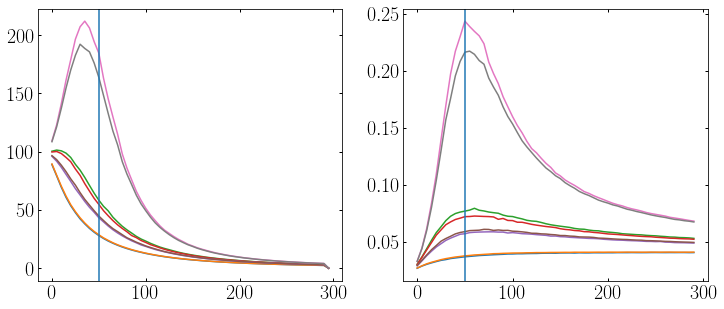

In [52]:
#plot(r_lmc, a_r_lmc)
figure(figsize=(12, 5))
subplot(1, 2, 1)
plot(r_lmc_1, a_r_lmc_1)
plot(r_lmc_2, a_r_lmc_2)
plot(r_lmc_3, a_r_lmc_3)
plot(r_lmc_4, a_r_lmc_4)
plot(r_lmc_5, a_r_lmc_5)
plot(r_lmc_6, a_r_lmc_6)
plot(r_lmc_7, a_r_lmc_7)
plot(r_lmc_8, a_r_lmc_8)
axvline(50)

subplot(1, 2, 2)
plot(r_lmc_1, a_r_lmc_1/a_r_mw_1)
plot(r_lmc_2, a_r_lmc_2/a_r_mw_2)
plot(r_lmc_3, a_r_lmc_3/a_r_mw_3)
plot(r_lmc_4, a_r_lmc_4/a_r_mw_4)
plot(r_lmc_5, a_r_lmc_5/a_r_mw_5)
plot(r_lmc_6, a_r_lmc_6/a_r_mw_6)
plot(r_lmc_7, a_r_lmc_7/a_r_mw_7)
plot(r_lmc_8, a_r_lmc_8/a_r_mw_8)
axvline(50)

In [35]:
r_wake_1, a_r_wake1_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=1)
r_wake_2, a_r_wake2_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=2)
r_wake_3, a_r_wake3_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=3)
r_wake_4, a_r_wake4_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=4)
r_wake_5, a_r_wake5_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=5)
r_wake_6, a_r_wake6_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=6)
r_wake_7, a_r_wake7_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=7)
r_wake_8, a_r_wake8_2, a_r = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=8)

1
2
3
4
5
6
7
8


In [46]:
r_wake_1, a_r_wake1 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=1)
r_wake_2, a_r_wake2 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=2)
r_wake_3, a_r_wake3 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=3)
r_wake_4, a_r_wake4 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=4)
r_wake_5, a_r_wake5 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=5)
r_wake_6, a_r_wake6 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=6)
r_wake_7, a_r_wake7 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=7)
r_wake_8, a_r_wake8 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw, T_mw, 40.85, M=1, shift=0, octant=8)


1
2
3
4
5
6
7
8


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launche

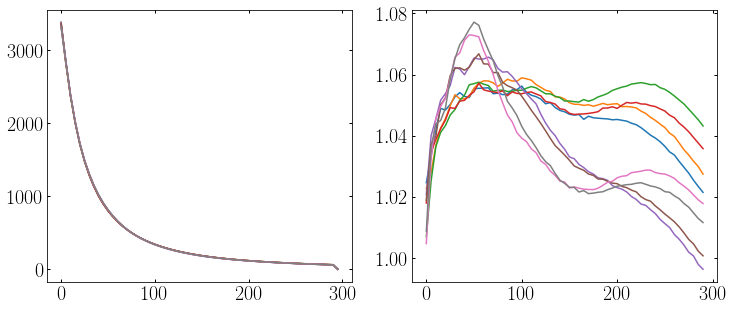

In [48]:
figure(figsize=(12, 5))
subplot(1, 2, 1)
plot(r_wake_1, a_r_wake1)
plot(r_wake_2, a_r_wake2)
plot(r_wake_3, a_r_wake3)
plot(r_wake_4, a_r_wake4)
plot(r_wake_5, a_r_wake5)
plot(r_wake_6, a_r_wake6)
plot(r_wake_7, a_r_wake7)
plot(r_wake_8, a_r_wake8)

subplot(1, 2, 2)
plot(r_wake_1, a_r_wake1/a_r_mw_1)
plot(r_wake_2, a_r_wake2/a_r_mw_2)
plot(r_wake_3, a_r_wake3/a_r_mw_3)
plot(r_wake_4, a_r_wake4/a_r_mw_4)
plot(r_wake_5, a_r_wake5/a_r_mw_5)
plot(r_wake_6, a_r_wake6/a_r_mw_6)
plot(r_wake_7, a_r_wake7/a_r_mw_7)
plot(r_wake_8, a_r_wake8/a_r_mw_8)
#plot(r2, a_r_lmc__0)
#xlim(40, 80)

In [50]:
r_debris_1, a_r_debris1 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=1)
r_debris_2, a_r_debris2 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=2)
r_debris_3, a_r_debris3 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=3)
r_debris_4, a_r_debris4 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=4)
r_debris_5, a_r_debris5 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=5)
r_debris_6, a_r_debris6 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=6)
r_debris_7, a_r_debris7 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=7)
r_debris_8, a_r_debris8 = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mwlmc, T_mwlmc, 40.85, M=1, shift=0, octant=8)

1
2
3
4
5
6
7
8


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in true_divide
  del sys.path[0]
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:14: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:19: RuntimeWarning: invalid value encountered in true_divide
/usr/local/lib/python3.5/dist-packages/ipykernel_launche

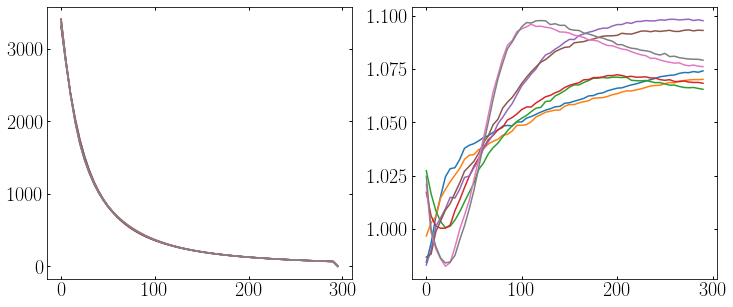

In [51]:
figure(figsize=(12, 5))
subplot(1, 2, 1)
plot(r_debris_1, a_r_debris1)
plot(r_debris_2, a_r_debris2)
plot(r_debris_3, a_r_debris3)
plot(r_debris_4, a_r_debris4)
plot(r_debris_5, a_r_debris5)
plot(r_debris_6, a_r_debris6)
plot(r_debris_7, a_r_debris7)
plot(r_debris_8, a_r_debris8)

subplot(1, 2, 2)
plot(r_debris_1, a_r_debris1/a_r_wake1)
plot(r_debris_2, a_r_debris2/a_r_wake2)
plot(r_debris_3, a_r_debris3/a_r_wake3)
plot(r_debris_4, a_r_debris4/a_r_wake4)
plot(r_debris_5, a_r_debris5/a_r_wake5)
plot(r_debris_6, a_r_debris6/a_r_wake6)
plot(r_debris_7, a_r_debris7/a_r_wake7)
plot(r_debris_8, a_r_debris8/a_r_wake8)
#plot(r2, a_r_lmc_0)
#xlim(40, 300)

In [108]:
## Acceleration Wake:

In [21]:
S_mw_wake = np.copy(S_mw)
T_mw_wake = np.copy(T_mw)
S_mw_wake[0,0,0] = 0
T_mw_wake[0,0,0] = 0

S_mw_ref = np.zeros(shape(S_mw))
T_mw_ref = np.zeros(shape(T_mw))
S_mw_ref[0,0,0] = S_mw[0,0,0]
T_mw_ref[0,0,0] = T_mw[0,0,0]
## almc + awake

In [142]:
colors =  plt.cm.Vega20b(2*(np.arange(8)).astype(int) )

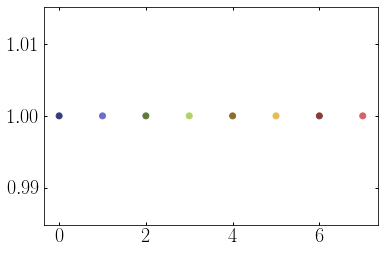

In [143]:
scatter(np.arange(8), np.ones(8), c=colors)

/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellA

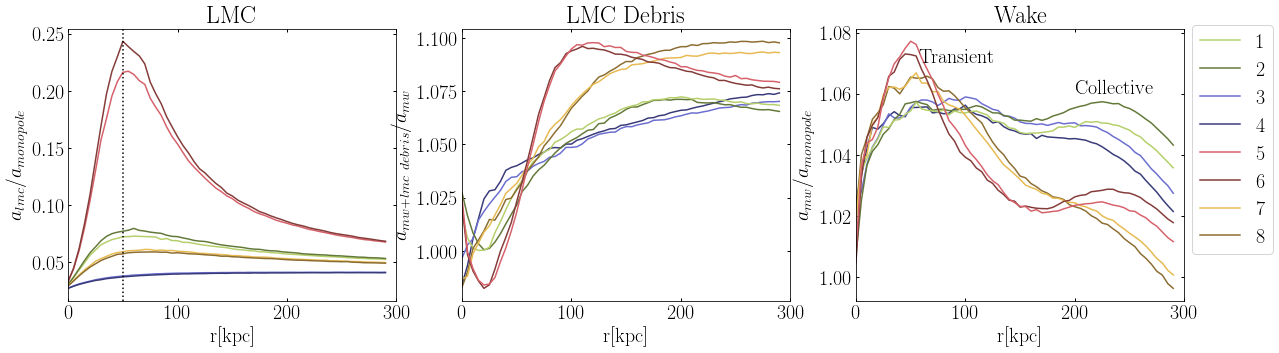

In [168]:
fig = figure(figsize=(20,5))

subplot(1, 3, 1)
title('LMC')
plot(r_lmc_4, a_r_lmc_4/a_r_mw_4, c=colors[3], label='1')
plot(r_lmc_3, a_r_lmc_3/a_r_mw_3, c=colors[2], label='2')
plot(r_lmc_2, a_r_lmc_2/a_r_mw_2, c=colors[1], label='3')
plot(r_lmc_1, a_r_lmc_1/a_r_mw_1, c=colors[0], label='4')
plot(r_lmc_8, a_r_lmc_8/a_r_mw_8, c=colors[7], label='5')
plot(r_lmc_7, a_r_lmc_7/a_r_mw_7, c=colors[6], label='6')
plot(r_lmc_6, a_r_lmc_6/a_r_mw_6, c=colors[5], label='7')
plot(r_lmc_5, a_r_lmc_5/a_r_mw_5, c=colors[4], label='8')
axvline(50, c='k', ls=':')
xlim(0, 300)
xlabel('r[kpc]')
ylabel('$a_{lmc}/a_{monopole}$')
legend(bbox_to_anchor=(3.7, 1.05))

subplot(1, 3, 2)
title('LMC Debris')
plot(r_debris_1, a_r_debris1/a_r_wake1, c=colors[0])
plot(r_debris_2, a_r_debris2/a_r_wake2, c=colors[1])
plot(r_debris_3, a_r_debris3/a_r_wake3, c=colors[2])
plot(r_debris_4, a_r_debris4/a_r_wake4, c=colors[3])
plot(r_debris_5, a_r_debris5/a_r_wake5, c=colors[4])
plot(r_debris_6, a_r_debris6/a_r_wake6, c=colors[5])
plot(r_debris_7, a_r_debris7/a_r_wake7, c=colors[6])
plot(r_debris_8, a_r_debris8/a_r_wake8, c=colors[7])
xlim(0, 300)
xlabel('r[kpc]')
ylabel('$a_{mw+lmc\ debris}/a_{mw}$')

subplot(1, 3, 3)
title('Wake')
plot(r_wake_1, a_r_wake1/a_r_mw_1, c=colors[0])
plot(r_wake_2, a_r_wake2/a_r_mw_2, c=colors[1])
plot(r_wake_3, a_r_wake3/a_r_mw_3, c=colors[2])
plot(r_wake_4, a_r_wake4/a_r_mw_4, c=colors[3])
plot(r_wake_5, a_r_wake5/a_r_mw_5, c=colors[4])
plot(r_wake_6, a_r_wake6/a_r_mw_6, c=colors[5])
plot(r_wake_7, a_r_wake7/a_r_mw_7, c=colors[6])
plot(r_wake_8, a_r_wake8/a_r_mw_8, c=colors[7])
text(58, 1.07, 'Transient')
text(200, 1.06, 'Collective')

xlim(0, 300)
xlabel('r[kpc]')
ylabel('$a_{mw}/a_{monopole}$')
#ylim(0, 1.1)
savefig('a_wake_lmc_debris_octants.pdf', bbox_inches='tight')
#savefig('a_wake_lmc_debris_octants.pdf', bbox_inches='tight')


In [15]:
#r_wake, a_r_wake = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, M=1)

In [16]:
## Acceleration of the debri
#S_debrii = S_mwlmc - S_mw
#T_debrii = T_mwlmc - T_mw


In [21]:
def grid(box_size, nbins):
    y_grid = np.linspace(-box_size/2., box_size/2., nbins)
    z_grid = np.linspace(-box_size/2., box_size/2., nbins)
    nbins = len(y_grid)
    y_grid, z_grid = np.meshgrid(y_grid, z_grid)
    
    return y_grid, z_grid, nbins

def bfe_a_grid(S1, T1, y_grid, z_grid, rs):
    xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                             y_grid.flatten(),
                                             z_grid.flatten()]).T)
    a = biff.gradient(xyz, S1, T1, M=1, r_s=rs, G=1)
    a_mw = (a[:,0]**2 + a[:,1]**2 + a[:,2]**2)**0.5
    return a_mw

def bfe_rho_grid(S1, T1, y_grid, z_grid, rs, shift=0):
    xyz = np.ascontiguousarray(np.array([np.zeros(len(y_grid.flatten())),
                                             y_grid.flatten(),
                                             z_grid.flatten()]).T)
    if shift==1:
        xyz = spherical_grid_shift(xyz, [-1.6172733999999993, -41.39907439, -27.93125875])
    rho = biff.density(xyz, S1, T1, M=1, r_s=rs)
    return rho

In [22]:
ygr, zgr, _ = grid(400, 100)
a_wake = bfe_a_grid(S_mw_wake, T_mw_wake, ygr, zgr, 40.85)
rho_wake = bfe_rho_grid(S_mw_wake, T_mw_wake, ygr, zgr, 40.85)
#rho_wake2 = bfe_rho_grid(S_mw/S_mw_ref, T_mw/T_mw_ref, ygr, zgr, 40.85)

In [23]:
a_mw = bfe_a_grid(S_mw, T_mw, ygr, zgr, 40.85)
a_mw_ref = bfe_a_grid(S_mw_ref, T_mw_ref, ygr, zgr, 40.85)

rho_mw = bfe_rho_grid(S_mw, T_mw, ygr, zgr, 40.85)
rho_mw_ref = bfe_rho_grid(S_mw_ref, T_mw_ref, ygr, zgr, 40.85)

In [24]:
rho_mwf = bfe_rho_grid(S_mwlmc, T_mwlmc, ygr, zgr, 40.85)
rho_lmc = bfe_rho_grid(S_lmc, T_lmc, ygr, zgr, 40.85, shift=1)


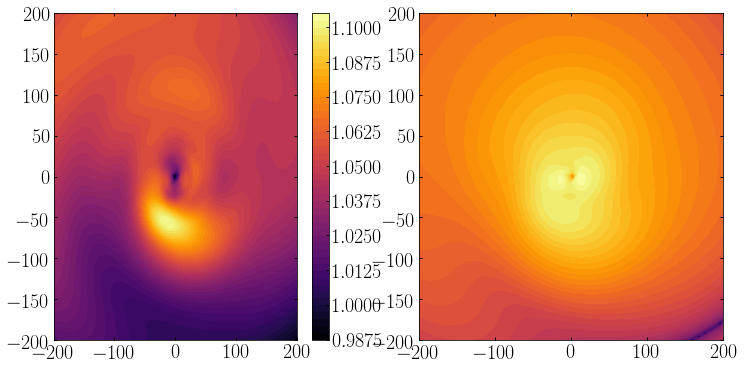

In [25]:
figure(figsize=(12,6))
subplot(1, 2, 1)
contourf(ygr, zgr, ((a_mw/a_mw_ref).reshape(_, _)), 50, cmap='inferno')
colorbar()
subplot(1, 2, 2)
contourf(ygr, zgr, np.log10(np.abs((a_mw-a_mw_ref).reshape(_, _))), 50, cmap='inferno')


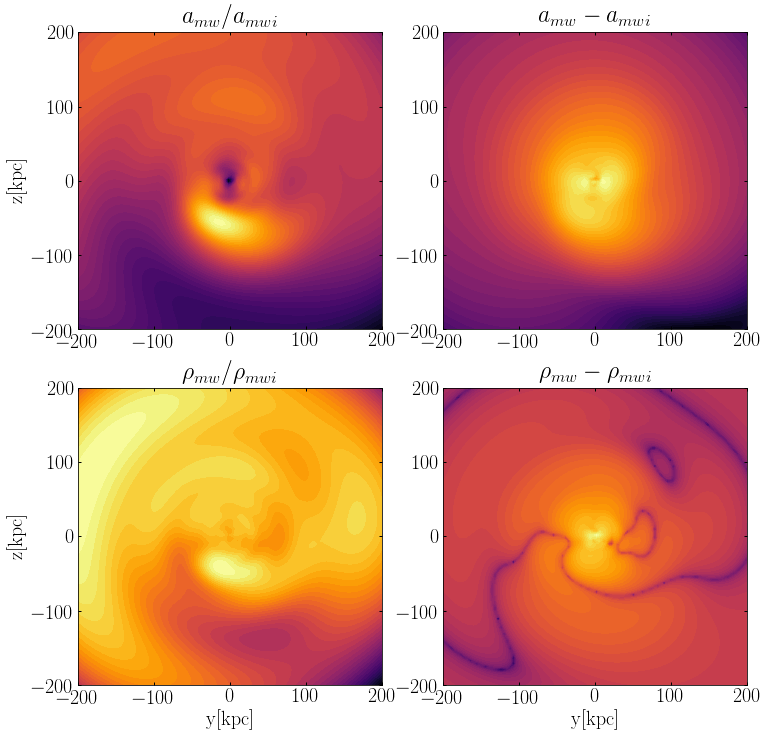

In [33]:
figure(figsize=(12,12))
subplot(2, 2, 1)
title('$a_{mw}/a_{mwi}$')
contourf(ygr, zgr, np.log10(np.abs((a_mw/a_mw_ref).reshape(_, _))), 50, cmap='inferno')
ylabel('z[kpc]')


subplot(2, 2, 2)
title('$a_{mw}-a_{mwi}$')
contourf(ygr, zgr, np.log10(np.abs(a_wake.reshape(_, _))), 50, cmap='inferno')


subplot(2, 2, 3)
title(r'$\rho_{mw}/\rho_{mwi}$')
contourf(ygr, zgr, np.log10(np.abs((rho_mw/rho_mw_ref).reshape(_, _))), 50, cmap='inferno')
xlabel('y[kpc]')
ylabel('z[kpc]')


subplot(2, 2, 4)
title(r'$\rho_{mw}-\rho_{mwi}$')
contourf(ygr, zgr, np.log10(np.abs((rho_mw-rho_mw_ref).reshape(_, _))), 50, cmap='inferno')
plt.Circle((0,0), radius= 50, color='k')
xlabel('y[kpc]')

savefig('Wake_definition.png', bbox_inches='tight')


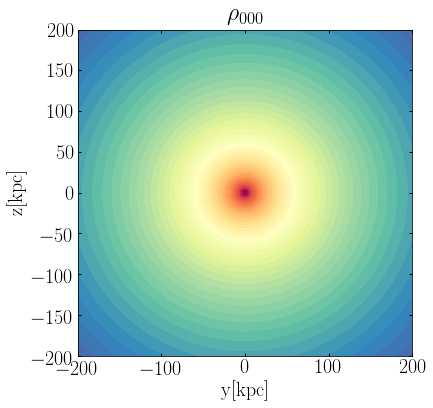

In [73]:
figure(figsize=(6,6))
subplot(1, 1, 1)
title(r'$\rho_{000}$')
contourf(ygr, zgr, np.log10(np.abs((rho_mw_ref).reshape(_, _))), 50
         , cmap='Spectral_r', vmin=-7.2, vmax=-2.3)
#scatter(-41, -28, c='k')
xlabel('y[kpc]')
ylabel('z[kpc]')
savefig('rho_000.pdf', bbox_inches='tight')


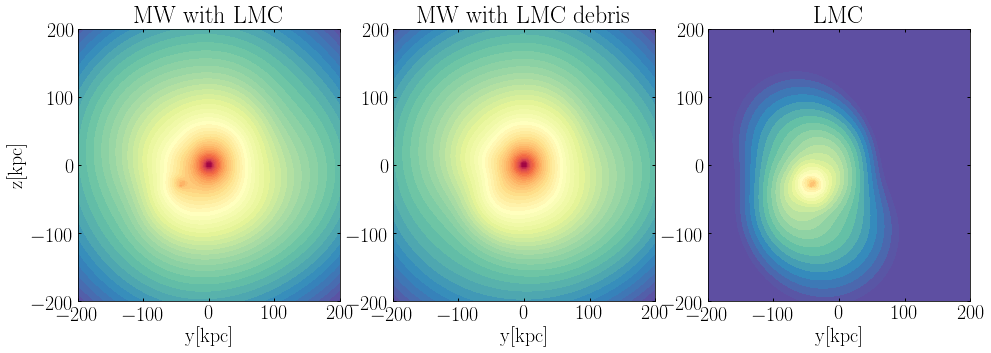

In [38]:
figure(figsize=(16,5))

subplot(1, 3, 1)
title('MW with LMC')
contourf(ygr, zgr, np.log10(np.abs((rho_lmc+rho_mwf).reshape(_, _))), 50
         , cmap='Spectral_r', vmin=-7.2, vmax=-2.3)
#scatter(-41, -28, c='k')
xlabel('y[kpc]')
ylabel('z[kpc]')

subplot(1, 3, 2)
title('MW with LMC debris')

contourf(ygr, zgr, np.log10(np.abs((rho_mwf).reshape(_, _))), 50, cmap='Spectral_r', vmin=-7.2, vmax=-2.3)
xlabel('y[kpc]')

subplot(1, 3, 3)
title('LMC')
contourf(ygr, zgr, np.log10(np.abs((rho_lmc).reshape(_, _))), 50, cmap='Spectral_r', vmin=-7.2, vmax=-2.3)
xlabel('y[kpc]')

savefig('mw_lmc_dens_bfe.pdf', bbox_inches='tight')

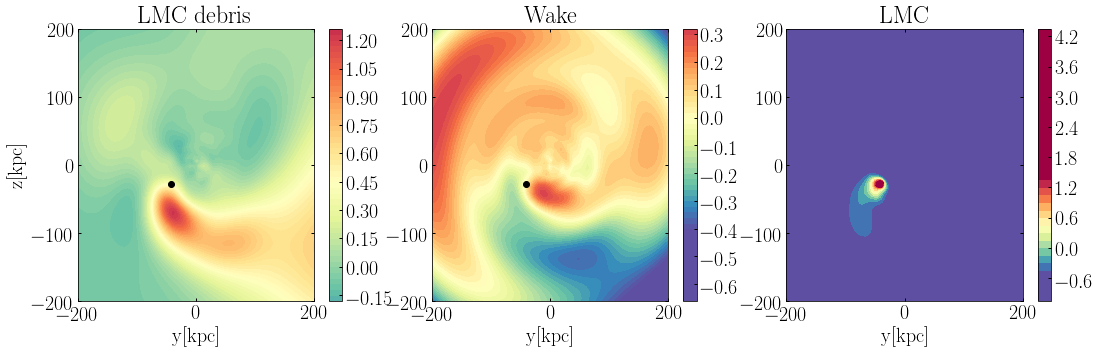

In [75]:
figure(figsize=(18,5))
subplot(1, 3, 1)
title('LMC debris')
contourf(ygr, zgr, (((rho_mwf/rho_mw).reshape(_, _)))-1, 50, cmap='Spectral_r', vmin=-0.5, vmax=1.4)
colorbar()
scatter(-41, -28, c='k')
ylabel('z[kpc]')
xlabel('y[kpc]')

subplot(1, 3, 2)
title('Wake')
contourf(ygr, zgr, (((rho_mw/rho_mw_ref).reshape(_, _)))-1, 50, cmap='Spectral_r', vmin=-0.4, vmax=0.4)
colorbar()
scatter(-41, -28, c='k')
xlabel('y[kpc]')


subplot(1, 3, 3)
title('LMC')
contourf(ygr, zgr, (((rho_lmc/rho_mw_ref).reshape(_, _)))-1, 50, cmap='Spectral_r', vmin=-0.5, vmax=1.4)
colorbar()
#scatter(-41, -28, c='k')
xlabel('y[kpc]')
savefig('dens_components.png', bbox_inches='tight')

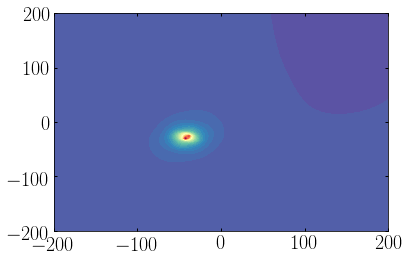

In [37]:
contourf(ygr, zgr, (((rho_lmc).reshape(_, _)))-1, 50, cmap='Spectral_r')


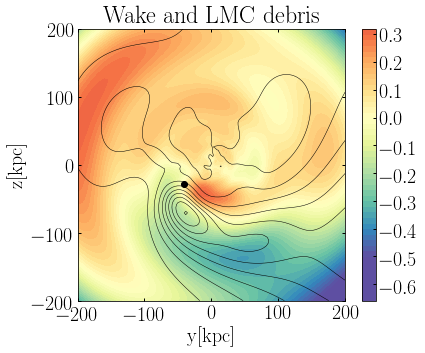

In [32]:
figure(figsize=(6,5))
title('Wake and LMC debris')
contourf(ygr, zgr, (rho_mw/rho_mw_ref).reshape(_, _)-1, 50, cmap='Spectral_r', vmin=-0.5, vmax=0.5)
colorbar()
contour(ygr, zgr, ((rho_mwf/rho_mw).reshape(_, _))-1, 10, vmin=-0.5, vmax=0.5, 
        colors='k', linewidths=0.5)
scatter(-41, -28, c='k')

xlabel('y[kpc]')
ylabel('z[kpc]')
savefig('wake_lmc_debris.png', bbox_inches='tight')

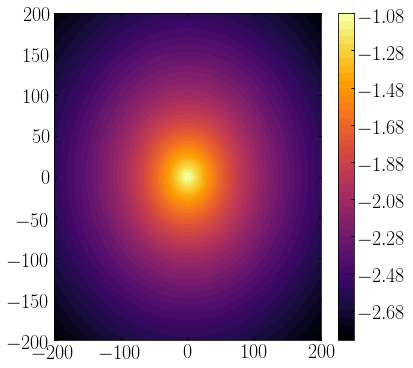

In [17]:
figure(figsize=(6,6))
contourf(ygr, zgr, np.log10(np.abs(a_mw.reshape(_, _))), 50, cmap='inferno')
colorbar()

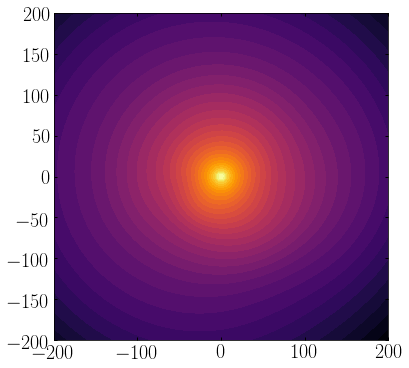

In [31]:
figure(figsize=(6,6))
contourf(ygr, zgr, np.log10(np.abs(rho_mw.reshape(_, _))), 50, cmap='inferno')


In [158]:
r_d, a_r_d = eval_bfe_spherical_grid(100000, 0, 300, 5, S_debrii, T_debrii, 40.85, M=1)

In [159]:
## Acceleration of the mw

In [160]:
r_mw, a_r_mw = eval_bfe_spherical_grid(100000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, M=1)

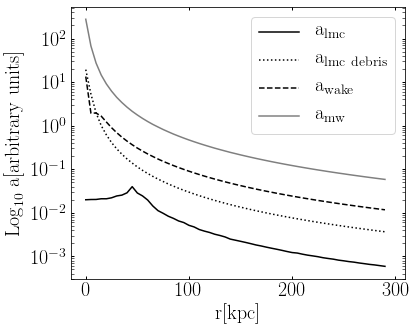

In [168]:
figure(figsize=(6,5))
semilogy(r_lmc, a_r_lmc, label=r'$\rm{a_{lmc}}$', c='k')
semilogy(r_d, a_r_d, label=r'$\rm{a_{lmc\ debris}}$', c='k', ls=':')
semilogy(r_wake, a_r_wake, label=r'$\rm{a_{wake}}$', c='k', ls='--')

semilogy(r_mw, a_r_mw, label=r'$\rm{a_{mw}}$', c='k', alpha=0.5)
ylabel(r'$\rm{Log}_{10}$ a[arbitrary units]')
xlabel('r[kpc]')
legend()

In [180]:
r_wake_o1, a_r_wake_o1 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=1)
r_wake_o2, a_r_wake_o2 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=2)
r_wake_o3, a_r_wake_o3 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=3)
r_wake_o4, a_r_wake_o4 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=4)

In [193]:
r_wake_o5, a_r_wake_o5 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=5)
r_wake_o6, a_r_wake_o6 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=6)
r_wake_o7, a_r_wake_o7 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=7)
r_wake_o8, a_r_wake_o8 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_wake, T_mw_wake, 40.85, octant=8)

In [171]:
r_d_o1, a_r_d_o1 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=1)
r_d_o2, a_r_d_o2 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=2)
r_d_o3, a_r_d_o3 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=3)
r_d_o4, a_r_d_o4 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=4)
r_d_o5, a_r_d_o5 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=5)
r_d_o6, a_r_d_o6 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=6)
r_d_o7, a_r_d_o7 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=7)
r_d_o8, a_r_d_o8 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_debrii, T_debrii, 40.85, octant=8)



In [172]:
r_lmc_o1, a_r_lmc_o1 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=1)
r_lmc_o2, a_r_lmc_o2 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=2)
r_lmc_o3, a_r_lmc_o3 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=3)
r_lmc_o4, a_r_lmc_o4 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=4)
r_lmc_o5, a_r_lmc_o5 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=5)
r_lmc_o6, a_r_lmc_o6 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=6)
r_lmc_o7, a_r_lmc_o7 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=7)
r_lmc_o8, a_r_lmc_o8 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_lmc, T_lmc, 10, shift=1, octant=8)


In [173]:
r_mw_o1, a_r_mw_o1 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=1)
r_mw_o2, a_r_mw_o2 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=2)
r_mw_o3, a_r_mw_o3 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=3)
r_mw_o4, a_r_mw_o4 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=4)
r_mw_o5, a_r_mw_o5 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=5)
r_mw_o6, a_r_mw_o6 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=6)
r_mw_o7, a_r_mw_o7 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=7)
r_mw_o8, a_r_mw_o8 = eval_bfe_spherical_grid(10000, 0, 300, 5, S_mw_ref, T_mw_ref, 40.85, shift=0, octant=8)


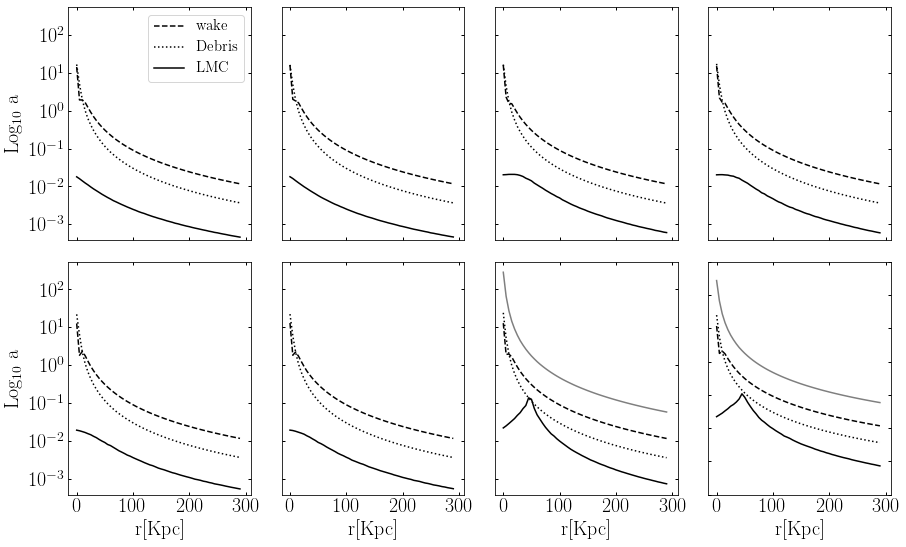

In [194]:
fig, ax = subplots(2, 4, figsize=(13, 8), sharex=True, sharey=True)


ax[0][0].semilogy(r_wake_o1, a_r_wake_o1, c='k', ls='--', label='wake')
ax[0][0].semilogy(r_d_o1, a_r_d_o1, c='k', ls=':', label='Debris')
ax[0][0].semilogy(r_lmc_o1, a_r_lmc_o1, c='k', label='LMC')
#ax[0][0].semilogy(r_mw_o1, a_r_mw_o1, c='k', alpha=0.5)
ax[0][0].legend(fontsize=15)

ax[0][1].semilogy(r_wake_o2, a_r_wake_o2, c='k', ls='--')
ax[0][1].semilogy(r_d_o2, a_r_d_o2, c='k', ls=':')
ax[0][1].semilogy(r_lmc_o2, a_r_lmc_o2, c='k')

ax[0][2].semilogy(r_wake_o3, a_r_wake_o3, c='k', ls='--')
ax[0][2].semilogy(r_d_o3, a_r_d_o3, c='k', ls=':')
ax[0][2].semilogy(r_lmc_o3, a_r_lmc_o3, c='k')

ax[0][3].semilogy(r_wake_o4, a_r_wake_o4, c='k', ls='--')
ax[0][3].semilogy(r_d_o4, a_r_d_o4, c='k', ls=':')
ax[0][3].semilogy(r_lmc_o4, a_r_lmc_o4, c='k')

ax[1][0].semilogy(r_wake_o5, a_r_wake_o5, c='k', ls='--')
ax[1][0].semilogy(r_d_o5, a_r_d_o5, c='k', ls=':')
ax[1][0].semilogy(r_lmc_o5, a_r_lmc_o5, c='k')

ax[1][1].semilogy(r_wake_o6, a_r_wake_o6, c='k', ls='--')
ax[1][1].semilogy(r_d_o6, a_r_d_o6, c='k', ls=':')
ax[1][1].semilogy(r_lmc_o6, a_r_lmc_o6, c='k')

ax[1][2].semilogy(r_wake_o7, a_r_wake_o7, c='k', ls='--')
ax[1][2].semilogy(r_d_o7, a_r_d_o7, c='k', ls=':')
ax[1][2].semilogy(r_lmc_o7, a_r_lmc_o7, c='k')
ax[1][2].semilogy(r_mw_o7, a_r_mw_o7, c='k', alpha=0.5)

ax[1][3].semilogy(r_wake_o8, a_r_wake_o8, c='k', ls='--')
ax[1][3].semilogy(r_d_o8, a_r_d_o8, c='k', ls=':')
ax[1][3].semilogy(r_lmc_o8, a_r_lmc_o8, c='k')
ax[1][3].semilogy(r_mw_o8, a_r_mw_o8, c='k', alpha=0.5)

ax[1][0].set_xlabel('r[Kpc]')
ax[1][1].set_xlabel('r[Kpc]')
ax[1][2].set_xlabel('r[Kpc]')
ax[1][3].set_xlabel('r[Kpc]')

ax[0][0].set_ylabel('Log$_{10}$ a')
ax[1][0].set_ylabel('Log$_{10}$ a')
xticks([0, 100, 200, 300])
yticks([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
tight_layout()
#savefig('octants_wake.png')

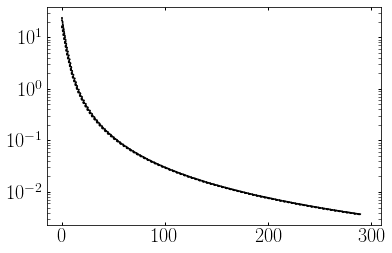

In [195]:
semilogy(r_d_o1, a_r_d_o1, c='k', ls=':')
semilogy(r_d_o2, a_r_d_o2, c='k', ls=':')
semilogy(r_d_o3, a_r_d_o3, c='k', ls=':')
semilogy(r_d_o4, a_r_d_o4, c='k', ls=':')
semilogy(r_d_o5, a_r_d_o5, c='k', ls=':')
semilogy(r_d_o6, a_r_d_o6, c='k', ls=':')
semilogy(r_d_o7, a_r_d_o7, c='k', ls=':')
semilogy(r_d_o8, a_r_d_o8, c='k', ls=':')
